In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\rutuj\Downloads\archive (16)\dogs_vs_cats\train",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\rutuj\Downloads\archive (16)\dogs_vs_cats\test",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


625/625 [==============================] - 1461s 2s/step - loss: 1.3742 - accuracy: 0.5847 - val_loss: 0.7090 - val_accuracy: 0.6466
Epoch 2/10
625/625 [==============================] - 1269s 2s/step - loss: 0.5656 - accuracy: 0.7128 - val_loss: 0.5681 - val_accuracy: 0.7192
Epoch 3/10
625/625 [==============================] - 1220s 2s/step - loss: 0.4835 - accuracy: 0.7697 - val_loss: 0.5053 - val_accuracy: 0.7654
Epoch 4/10
625/625 [==============================] - 1274s 2s/step - loss: 0.4124 - accuracy: 0.8114 - val_loss: 0.8122 - val_accuracy: 0.6750
Epoch 5/10
625/625 [==============================] - 1344s 2s/step - loss: 0.3654 - accuracy: 0.8389 - val_loss: 3.3822 - val_accuracy: 0.5446
Epoch 6/10
625/625 [==============================] - 1312s 2s/step - loss: 0.3116 - accuracy: 0.8654 - val_loss: 0.5414 - val_accuracy: 0.7814
Epoch 7/10
625/625 [==============================] - 1270s 2s/step - loss: 0.2113 - accuracy: 0.9172 - val_loss: 0.5816 - val_accurac

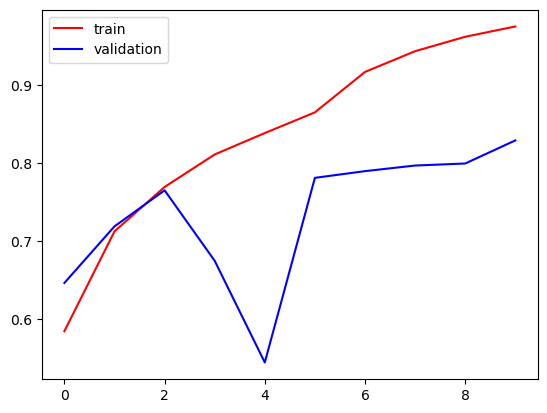

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

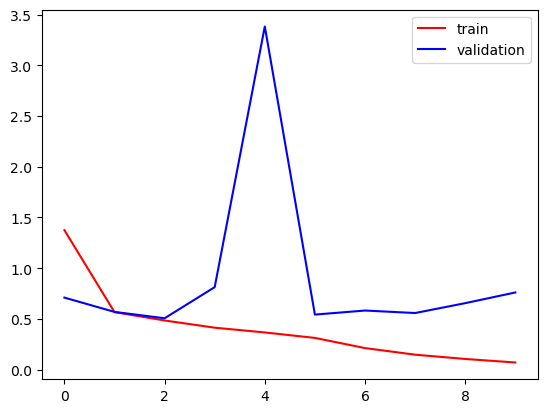

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [28]:
import cv2

In [38]:
test_img = cv2.imread(r"C:\Users\rutuj\Downloads\archive (16)\dogs_vs_cats\test\cats\cat1.jpg")

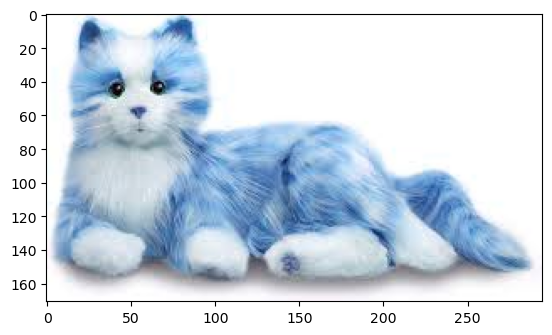

In [39]:
plt.imshow(test_img)

In [40]:
test_img.shape

(171, 295, 3)

In [41]:
test_img = cv2.resize(test_img,(256,256))

In [42]:
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 71ms/step


array([[0.]], dtype=float32)